광고 제거

In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [25]:
data = pd.read_csv('술 리뷰(전체).csv', encoding='utf-8-sig')
data

,date,star,text,name
0,2022-10-31,5,지인으로부터 알게된 복순도가 막걸리처음 먹는순간 너무 맛있어서 깜짝놀랐어요원래 술을...,복순도가
1,2022-11-17,5,그냥 차게 마셔도 군내나 잔여물 찌꺼기 느낌이 거의 없이 깔끔담백하고 샴페인처럼 톡...,복순도가
2,2022-10-19,5,지인이 비싼데 고급지고 맛있는 막걸리가있다고 해서하도 궁금하여 한번 시켜봤어요배송도...,복순도가
3,2022-10-28,3,본인은 맛있었는데 아버지는 너무 삭힌거같다는 평이네요 새콤함이 좀 있긴함근데 막걸리...,복순도가
4,2022-10-13,5,복순도가 맛있다고 한참전에 소문만 들었지 먹어본것은 올해가 처음이네요 평소에도 달달...,복순도가
...,...,...,...,...
41871,2022-01-09,5,비싸기도하고 3병씩 사게되니 한번에 몰아먹어야해서 자주는 안사먹지만 막걸리땡길때 한...,복순도가
41872,2022-01-09,5,백스피릿보고 구매했어요1개는 배송비가 있어서 3개 구매했어요오자마자 전복솥밥이랑 마...,복순도가
41873,2022-01-09,5,선물하려구 재구매했어요,복순도가
41874,2022-01-08,5,명절에 맛있게 잘 나눠먹었어요,복순도가


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41876 entries, 0 to 41875
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    41876 non-null  object
 1   star    41876 non-null  int64 
 2   text    41847 non-null  object
 3   name    41876 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [27]:
data = data.dropna()
data

,date,star,text,name
0,2022-10-31,5,지인으로부터 알게된 복순도가 막걸리처음 먹는순간 너무 맛있어서 깜짝놀랐어요원래 술을...,복순도가
1,2022-11-17,5,그냥 차게 마셔도 군내나 잔여물 찌꺼기 느낌이 거의 없이 깔끔담백하고 샴페인처럼 톡...,복순도가
2,2022-10-19,5,지인이 비싼데 고급지고 맛있는 막걸리가있다고 해서하도 궁금하여 한번 시켜봤어요배송도...,복순도가
3,2022-10-28,3,본인은 맛있었는데 아버지는 너무 삭힌거같다는 평이네요 새콤함이 좀 있긴함근데 막걸리...,복순도가
4,2022-10-13,5,복순도가 맛있다고 한참전에 소문만 들었지 먹어본것은 올해가 처음이네요 평소에도 달달...,복순도가
...,...,...,...,...
41871,2022-01-09,5,비싸기도하고 3병씩 사게되니 한번에 몰아먹어야해서 자주는 안사먹지만 막걸리땡길때 한...,복순도가
41872,2022-01-09,5,백스피릿보고 구매했어요1개는 배송비가 있어서 3개 구매했어요오자마자 전복솥밥이랑 마...,복순도가
41873,2022-01-09,5,선물하려구 재구매했어요,복순도가
41874,2022-01-08,5,명절에 맛있게 잘 나눠먹었어요,복순도가


### 광고글 특징
1. 특정 단어 포함한 게시글 : '제공받아', '지원받아','해당업체'
2. (네이버 블로그만의 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번

In [28]:
# # 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있게 함
# # 분석가 판단 하에 추가 광고 문구 확인하여 stopwords에 추가

# Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
#              '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
#              '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널']


In [29]:
# data = data[~data['review'].str.contains('|'.join(Stopwords))]
# data = data.reset_index(drop=True)
# data

2번

In [30]:
# ix = data['review'].str.len() > 3000
# data = data.loc[~ix]
# data = data.reset_index(drop=True)
# data

In [31]:
# 기본 전처리
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus


In [32]:
# # 블로그 본문, 댓글 합쳐 하나의 document로 만들기

# data['doc'] = data['review'] + ' ' + data['comment']
# data.head

In [33]:
data.text = data.text.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.text = data.text.str.replace('\s+',' ')  # white space(빈칸) 삭제
data

C:\Users\user\AppData\Local\Temp\ipykernel_15220\2766560985.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_15220\2766560985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.text = data.text.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_15220\2766560985.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace('\s+',' ')  # white space(빈칸) 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_15220\2766560985.py:2: SettingWithCopyWarning: 
A value is try

,date,star,text,name
0,2022-10-31,5,지인으로부터 알게된 복순도가 막걸리처음 먹는순간 너무 맛있어서 깜짝놀랐어요원래 술을...,복순도가
1,2022-11-17,5,그냥 차게 마셔도 군내나 잔여물 찌꺼기 느낌이 거의 없이 깔끔담백하고 샴페인처럼 톡...,복순도가
2,2022-10-19,5,지인이 비싼데 고급지고 맛있는 막걸리가있다고 해서하도 궁금하여 한번 시켜봤어요배송도...,복순도가
3,2022-10-28,3,본인은 맛있었는데 아버지는 너무 삭힌거같다는 평이네요 새콤함이 좀 있긴함근데 막걸리...,복순도가
4,2022-10-13,5,복순도가 맛있다고 한참전에 소문만 들었지 먹어본것은 올해가 처음이네요 평소에도 달달...,복순도가
...,...,...,...,...
41871,2022-01-09,5,비싸기도하고 병씩 사게되니 한번에 몰아먹어야해서 자주는 안사먹지만 막걸리땡길때 한번...,복순도가
41872,2022-01-09,5,백스피릿보고 구매했어요 개는 배송비가 있어서 개 구매했어요오자마자 전복솥밥이랑 마셨...,복순도가
41873,2022-01-09,5,선물하려구 재구매했어요,복순도가
41874,2022-01-08,5,명절에 맛있게 잘 나눠먹었어요,복순도가


In [34]:
tqdm.pandas()

#data['doc'] = data['doc'].progress_apply(lambda x : clean_text(x)) # 만든 함수를 적용하는건데 뭔가 오류가 있는 것 같아서 일단 사용 X

In [35]:
data.to_csv('술 리뷰(전처리).csv', encoding='utf-8-sig')

### 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해 줌
- 단어로 만드는 과정에서 
    1) 분석에 불필요한 불용어 제거 
    2) 단어를 사전형으로 처리(가고있다->가다, 있다)
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [36]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt

In [37]:
# 원하는 태그 추출 & 불용어 제거
okt = Okt()

# 불용어
stopwords = pd.read_csv('ko-stopwords.csv')
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','아니다','빠르다', '배송', '포장', '꼼꼼', '꼼꼼하다', '구매', '구매하다', '보다', '자다', '마시다', '보내다','공유', '하이', '가보다','이렇게', '추천', '들어가다', '도국', '따르다', '말다', '자리', '기본', '매장', '사장', '가게', '원', '점', '드리다','받다', '방문','도움말','아주','닫다','서울특별시','후기','완전','신고','정도','오다','주문','후','없다','고','이다','쓰리다 도어즈','없다','신고','추가','않다','많다','맛','맛있다','일요일','휴무','냠냠쩝쩝','냠냠','쩝쩝','수표','이웃','추가','닫다','틀다','차차','드므','맛집','술집','길','층','개다 성','사진','파다','동영상','아스 론','자다','는','희다 스토리','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기", "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다", "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다", "먹다", "보다", "좋다", "너무","을지로","신당", '꿀니', '복사', '이웃추가', '본문', '기타', '기능', '지도로', '보기', '더', '곳','전체', '지도', '지도닫기', '공유하기', '신고하기', '위치', '사진으로', '마무리', '안녕하세요', '안녕', '술집', '맛집','끝', '더보기', '지도', '데이터', '지도', '컨트롤러', '범례', '부동산', '거리', '읍', '면', '동시', '군', '구시', '도국가', '랭맥','공유하기 신고하기 더보기 지도 데이터 지도 컨트롤러 범례부동산거리읍 면 동시 군 구시 도국가', '스토리', '삼발이']) #불용어 추가

stopwords = set(stopwords)

# 형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)   # 형태소 분석, stem/norm : 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun','Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words

In [38]:
# 형태소 분석 적용
tokenizing_text = []
for i in tqdm(data['text']):
    tokenizing_text.append(okt_pos_tagging(i))
data['token'] = tokenizing_text  # 새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원문을 매칭

100%|██████████| 41847/41847 [03:06<00:00, 224.53it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_15220\3708220792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token'] = tokenizing_text  # 새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원문을 매칭


In [39]:
data.token

0        [지인, 알, 복, 순도, 막걸리, 처음, 순간, 깜짝, 원래, 술, 좋아하다, 사...
1        [그냥, 차다, 군내, 잔, 여물, 찌꺼기, 느낌, 없이, 깔다, 끄다, 담백하다,...
2        [지인, 비싸다, 고급, 지고, 막걸리, 궁금하다, 한번, 병, 차다, 예쁘다, 탄...
3              [본인, 아버지, 삭히다, 평이, 콤함, 함, 근데, 막걸리, 숙성, 콤함임]
4        [복, 순도, 참전, 소문, 올해, 처음, 요, 평소, 달달, 콤, 술, 좋아하다,...
                               ...                        
41871    [비싸다, 기도, 병, 사다, 한번, 몰다, 야하다, 자주, 사먹다, 막걸리, 땡기...
41872    [스피릿, 보고, 개다, 배송비, 전복, 솥밥, 평소, 막걸리, 감동, 자체, 주변...
41873                                             [선물, 재다]
41874                                            [명절, 나누다]
41875                                          [믿다, 복, 순도]
Name: token, Length: 41847, dtype: object

In [40]:
data

,date,star,text,name,token
0,2022-10-31,5,지인으로부터 알게된 복순도가 막걸리처음 먹는순간 너무 맛있어서 깜짝놀랐어요원래 술을...,복순도가,"[지인, 알, 복, 순도, 막걸리, 처음, 순간, 깜짝, 원래, 술, 좋아하다, 사..."
1,2022-11-17,5,그냥 차게 마셔도 군내나 잔여물 찌꺼기 느낌이 거의 없이 깔끔담백하고 샴페인처럼 톡...,복순도가,"[그냥, 차다, 군내, 잔, 여물, 찌꺼기, 느낌, 없이, 깔다, 끄다, 담백하다,..."
2,2022-10-19,5,지인이 비싼데 고급지고 맛있는 막걸리가있다고 해서하도 궁금하여 한번 시켜봤어요배송도...,복순도가,"[지인, 비싸다, 고급, 지고, 막걸리, 궁금하다, 한번, 병, 차다, 예쁘다, 탄..."
3,2022-10-28,3,본인은 맛있었는데 아버지는 너무 삭힌거같다는 평이네요 새콤함이 좀 있긴함근데 막걸리...,복순도가,"[본인, 아버지, 삭히다, 평이, 콤함, 함, 근데, 막걸리, 숙성, 콤함임]"
4,2022-10-13,5,복순도가 맛있다고 한참전에 소문만 들었지 먹어본것은 올해가 처음이네요 평소에도 달달...,복순도가,"[복, 순도, 참전, 소문, 올해, 처음, 요, 평소, 달달, 콤, 술, 좋아하다,..."
...,...,...,...,...,...
41871,2022-01-09,5,비싸기도하고 병씩 사게되니 한번에 몰아먹어야해서 자주는 안사먹지만 막걸리땡길때 한번...,복순도가,"[비싸다, 기도, 병, 사다, 한번, 몰다, 야하다, 자주, 사먹다, 막걸리, 땡기..."
41872,2022-01-09,5,백스피릿보고 구매했어요 개는 배송비가 있어서 개 구매했어요오자마자 전복솥밥이랑 마셨...,복순도가,"[스피릿, 보고, 개다, 배송비, 전복, 솥밥, 평소, 막걸리, 감동, 자체, 주변..."
41873,2022-01-09,5,선물하려구 재구매했어요,복순도가,"[선물, 재다]"
41874,2022-01-08,5,명절에 맛있게 잘 나눠먹었어요,복순도가,"[명절, 나누다]"


In [41]:
# 명사 추출
text_noun = [okt.nouns(text) for text in data.text]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])
data

C:\Users\user\AppData\Local\Temp\ipykernel_15220\937793510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_noun'] = text_noun
C:\Users\user\AppData\Local\Temp\ipykernel_15220\937793510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])


,date,star,text,name,token,text_noun
0,2022-10-31,5,지인으로부터 알게된 복순도가 막걸리처음 먹는순간 너무 맛있어서 깜짝놀랐어요원래 술을...,복순도가,"[지인, 알, 복, 순도, 막걸리, 처음, 순간, 깜짝, 원래, 술, 좋아하다, 사...","[지인, 알, 복, 순도, 막걸리, 처음, 순간, 깜짝, 원래, 술, 사람, 냉장고..."
1,2022-11-17,5,그냥 차게 마셔도 군내나 잔여물 찌꺼기 느낌이 거의 없이 깔끔담백하고 샴페인처럼 톡...,복순도가,"[그냥, 차다, 군내, 잔, 여물, 찌꺼기, 느낌, 없이, 깔다, 끄다, 담백하다,...","[그냥, 군내, 잔, 여물, 찌꺼기, 느낌, 샴페인, 톡, 상큼, 함, 전통, 샴페..."
2,2022-10-19,5,지인이 비싼데 고급지고 맛있는 막걸리가있다고 해서하도 궁금하여 한번 시켜봤어요배송도...,복순도가,"[지인, 비싸다, 고급, 지고, 막걸리, 궁금하다, 한번, 병, 차다, 예쁘다, 탄...","[지인, 고급, 지고, 막걸리, 한번, 병, 탄산, 스파클링, 와인, 기도, 사실,..."
3,2022-10-28,3,본인은 맛있었는데 아버지는 너무 삭힌거같다는 평이네요 새콤함이 좀 있긴함근데 막걸리...,복순도가,"[본인, 아버지, 삭히다, 평이, 콤함, 함, 근데, 막걸리, 숙성, 콤함임]","[본인, 아버지, 평이, 콤함, 함, 막걸리, 숙성, 콤함임]"
4,2022-10-13,5,복순도가 맛있다고 한참전에 소문만 들었지 먹어본것은 올해가 처음이네요 평소에도 달달...,복순도가,"[복, 순도, 참전, 소문, 올해, 처음, 요, 평소, 달달, 콤, 술, 좋아하다,...","[복, 순도, 참전, 소문, 올해, 처음, 요, 평소, 달달, 콤, 술, 편, 복,..."
...,...,...,...,...,...,...
41871,2022-01-09,5,비싸기도하고 병씩 사게되니 한번에 몰아먹어야해서 자주는 안사먹지만 막걸리땡길때 한번...,복순도가,"[비싸다, 기도, 병, 사다, 한번, 몰다, 야하다, 자주, 사먹다, 막걸리, 땡기...","[기도, 병, 한번, 자주, 막걸리, 한번, 연말, 파티, 덕분, 파티]"
41872,2022-01-09,5,백스피릿보고 구매했어요 개는 배송비가 있어서 개 구매했어요오자마자 전복솥밥이랑 마셨...,복순도가,"[스피릿, 보고, 개다, 배송비, 전복, 솥밥, 평소, 막걸리, 감동, 자체, 주변...","[스피릿, 보고, 배송비, 전복, 솥밥, 평소, 막걸리, 감동, 자체, 주변, 널리..."
41873,2022-01-09,5,선물하려구 재구매했어요,복순도가,"[선물, 재다]",[선물]
41874,2022-01-08,5,명절에 맛있게 잘 나눠먹었어요,복순도가,"[명절, 나누다]",[명절]


### wordcloud

In [42]:
# 리스트 차원 낮춰주는 함수 생성
# 하나의 리스트 안에 들어가야 하기 때문에 늘려주는 작업

def flatten(i):
    flatlist = []
    for elem in i :
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [43]:
data1 = data.token.tolist() # series -> list
data2 = flatten(data1)
data2[:20]

['지인',
 '알',
 '복',
 '순도',
 '막걸리',
 '처음',
 '순간',
 '깜짝',
 '원래',
 '술',
 '좋아하다',
 '사람',
 '수시로',
 '냉장고',
 '꺼내다',
 '달',
 '크다',
 '시큰하다',
 '샴페인',
 '탄산']

In [44]:
text = nltk.Text(data2)
text

<Text: 지인 알 복 순도 막걸리 처음 순간 깜짝...>

In [45]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

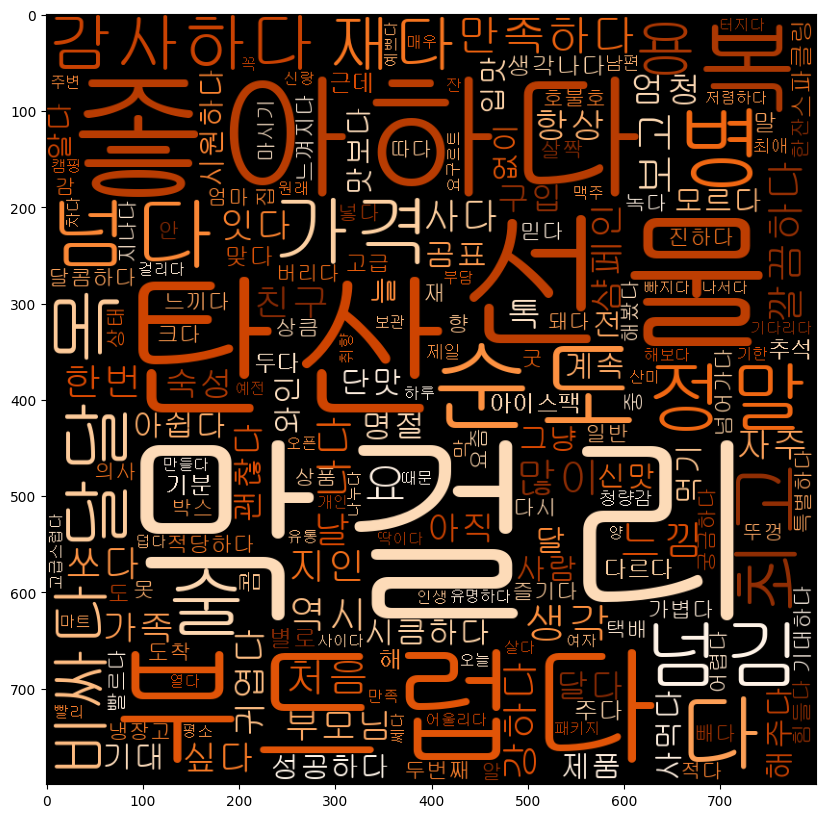

In [46]:
# 명사, 동사, 형용사, 부사로 워드클라우드

font_path = 'C:\Windows\Fonts\gulim.ttc'

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

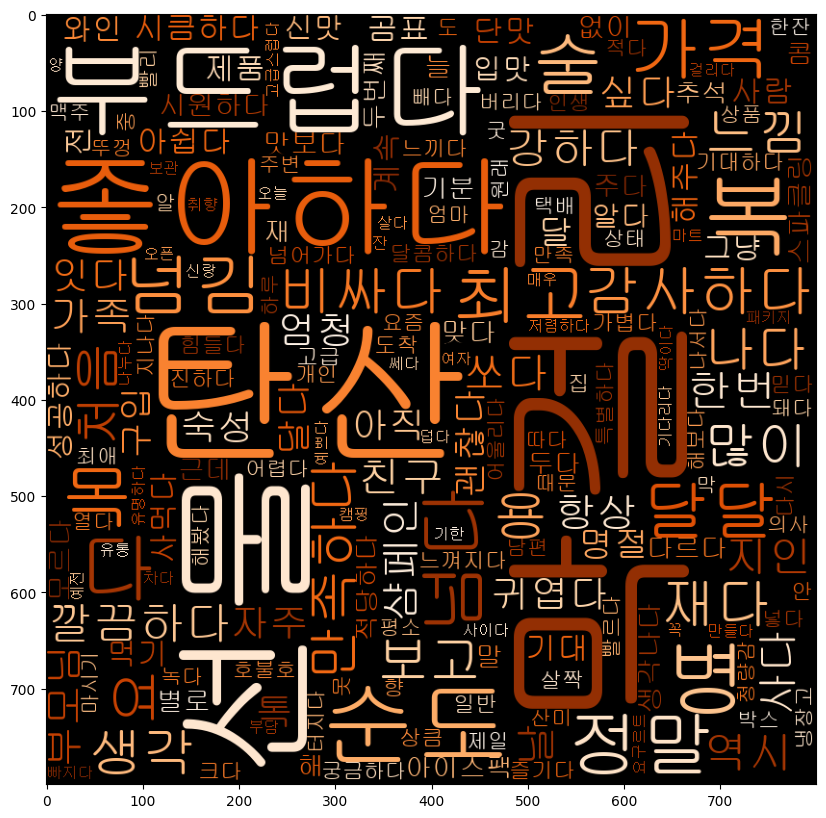

In [47]:
# 명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()


### 군집분석 - Clustering(Actor 도출)
- 단어가 많이 나온다고 무조건 중요한 단어가 아니라 
- 이 문서에만 독특하게 나오는 단어들이 중요하다고 생각하고 뽑아내는 코드 작성

### tf-idf

In [48]:
data3 = []

for i in data1:
    string = i[0]
    for w in i[1:]: # 첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " "   # 단어 사이는 띄어쓰기로 연결
        string += w # 띄어쓰기 후 다음 단어 써주기 반복
    data3.append(string)
data3   # 쉼표 기준으로 document가 구분됨

IndexError: list index out of range

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [ ]:
from collections import defaultdict

word2id = defaultdict(lambda:0)    # value가 없는 key인 경우 error대신 0을 출력

In [ ]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
# 단어들을 수치로 변환

In [ ]:
tfidf[0]

[('동대문', 0.6630699092446305),
 ('칵테일', 0.23429171660438178),
 ('바', 0.0),
 ('신선하다', 0.10598237255105648),
 ('냉장', 0.03837023496492596),
 ('고문', 0.042540395776889055),
 ('열다', 0.0754534138411476),
 ('장', 0.0),
 ('프리', 0.5071768944531645),
 ('인테리어', 0.027210640476678087),
 ('베이', 0.03761721966242227),
 ('벨', 0.0),
 ('도지', 0.007180595818527404),
 ('서울', 0.015883404162788193),
 ('중구', 0.04264971520797701),
 ('퇴계로', 0.06860238064021407),
 ('화', 0.0),
 ('목', 0.0),
 ('금', 0.0),
 ('토', 0.0),
 ('월요일', 0.02102570797551367),
 ('카페', 0.04520256704899701),
 ('메뉴', 0.008574444052323734),
 ('커피', 0.020327078906728246),
 ('생', 0.0),
 ('과일', 0.20440575225066515),
 ('주스', 0.03182790805278748),
 ('디저트', 0.022696913570980987),
 ('오후', 0.02198500691212714),
 ('가능', 0.018669200704548066),
 ('이후', 0.02508465914552442),
 ('다이닝', 0.06262011987692429),
 ('운영', 0.03915283109460997),
 ('장', 0.0),
 ('프리', 0.5071768944531645),
 ('장', 0.0),
 ('프리', 0.5071768944531645),
 ('중구', 0.04264971520797701),
 ('퇴계로', 0.068602

### 토픽 개수 정하기

In [ ]:
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

In [ ]:
dictionary = corpora.Dictionary(data1)
dictionary

In [ ]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왔는지
corpus = [dictionary.doc2bow(text) for text in data1]
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 3),
  (45, 1),
  (46, 1),
  (47, 1)]]

In [ ]:
values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))
    # perplexity(혼잡도) : 클러스터링 안의 결과들 간의 유사성 확인
    # 낮을수록 좋음

Text(0, 0.5, 'Score')

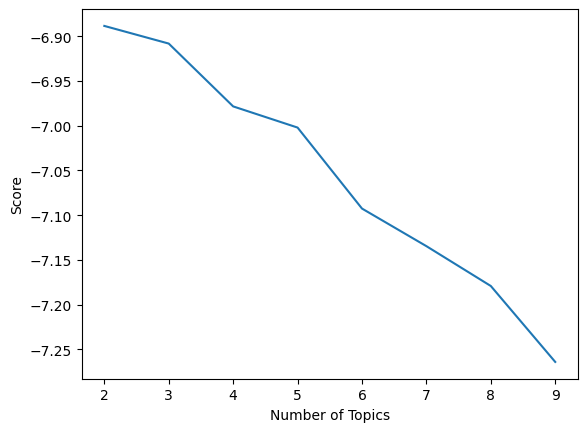

In [ ]:
x = range(2,10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')
# 꺾이는 부분을 기준으로 군집을 나눔
# 원본을 보고 그래프와 비슷한 경향인지 확인

In [ ]:
# coherence 확인(군집 평가)
# coherence 높을수록 일관성 높음 -> 좋음
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = data1, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


Text(0, 0.5, 'Score')

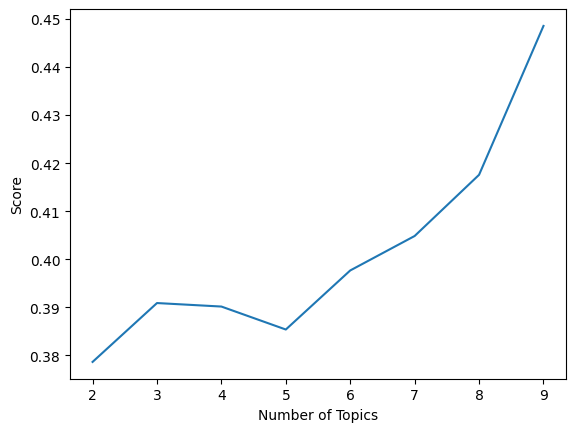

In [ ]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

### ward clustering
- 데이터의 수직적 구조를 파악할 수 있음

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc   # 수직적 구조 그릴 수 있는 기능

In [ ]:
data3

NameError: name 'data3' is not defined

In [ ]:
sp_matrix1 = vectorizer.fit_transform(data3)
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
result = cluster.fit_predict(df1)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_ward = data.copy()
df_ward['클러스터'] = list(result)  # 클러스터 배치 확인
df_ward.head()

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집 술 강남 강남역 맥주집 을지로 가맥 랭맥 복사 이웃추가 본문 기타 기능 지도...,"[술, 강남, 강남역, 맥주, 집, 맥, 도지, 공유, 전, 궁금하다, 강남역, 강...","[술, 강남, 강남역, 맥주, 집, 맥, 도지, 공유, 전, 강남역, 강남역, 노포...",0
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,블챌 주간일기 챌린지 월 셋째주 핫플탐방 을지로와 연희동 복사 이웃추가 본문 기타...,"[블챌, 주간, 일기, 채다, 린지, 주, 핫, 탐방, 연희동, 공유, 주간, 일기...","[블챌, 주간, 일기, 린지, 주, 핫, 탐방, 연희동, 공유, 주간, 일기, 린지...",0
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀미 복사 이웃추가 본문 기타 기...,"[라이프, 힙, 일산, 카페, 콘, 크라프트온, 꿀, 밉다, 공유, 엄마, 카페, ...","[라이프, 힙, 일산, 카페, 콘, 크라프트온, 꿀, 공유, 엄마, 카페, 투어, ...",0
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 종로 맛집 이색적인 음식으로 가득한 주교팔삼 복사 이웃추가 본문 기타 기...,"[종로, 이색, 음식, 가득하다, 주교, 팔삼, 도지, 공유, 주교, 오늘, 친하다...","[종로, 이색, 음식, 주교, 팔삼, 도지, 공유, 주교, 오늘, 언니, 서울, 나...",0
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,블챌 주간일기 챌린지 을지로 맛집 아키나이 제면 세광 양대창 카페 크림시크 빌리엔...,"[블챌, 주간, 일기, 채다, 린지, 아키, 나이, 광, 창, 카페, 크림, 시크,...","[블챌, 주간, 일기, 린지, 아키, 나이, 광, 창, 카페, 크림, 시크, 엔젤,...",0


In [ ]:
df_ward['클러스터'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
len(df_ward)

6891

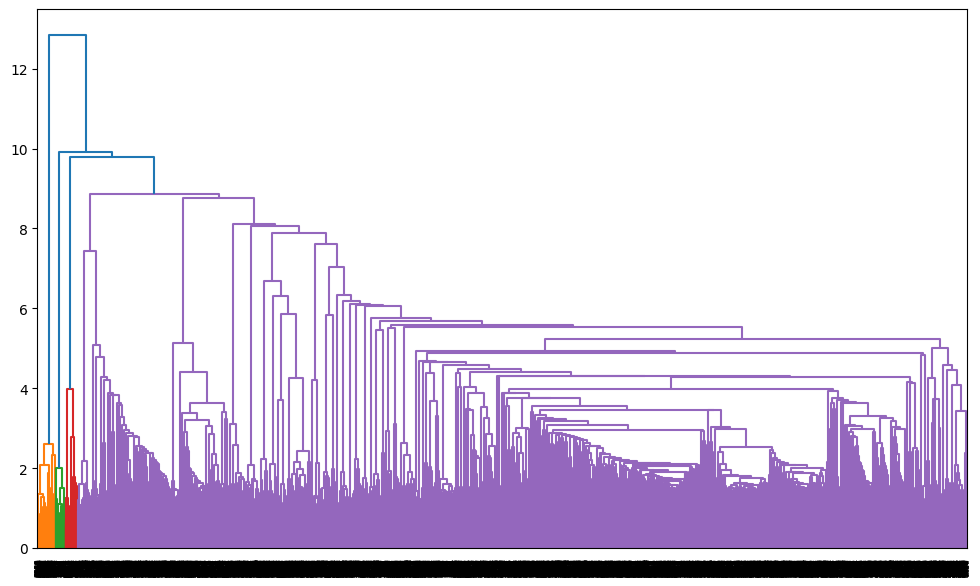

In [ ]:
plt.figure(figsize=(12,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))
# y축을 기준으로 클러스터 개수를 나눔

In [ ]:
import pickle
df_ward.to_pickle('을지로신당 술집_cluster(2022).pkl')
df_ward.to_csv('을지로신당 술집_clustering(2022).csv', encoding='utf-8-sig')

#### 다시 클러스터링

In [ ]:
# df_ward_0 = df_ward[df_ward['클러스터']==0]

In [ ]:
# data1_ex = df_ward_0.token.tolist() # series -> list
# data2_ex = flatten(data1_ex)
# data2_ex[:20]

['술',
 '강남',
 '강남역',
 '맥주',
 '집',
 '맥',
 '도지',
 '공유',
 '전',
 '궁금하다',
 '강남역',
 '강남역',
 '노포',
 '스타일',
 '특히',
 '메뉴',
 '보고',
 '반하다',
 '저장',
 '뒤늦다']

In [ ]:
# data3_ex = []

# for i in data1_ex:
#     string = i[0]
#     for w in i[1:]: # 첫번째 이후 단어부터 토큰으로 이어 붙여줌
#         string += " "   # 단어 사이는 띄어쓰기로 연결
#         string += w # 띄어쓰기 후 다음 단어 써주기 반복
#     data3_ex.append(string)
# data3_ex   # 쉼표 기준으로 document가 구분됨

['술 강남 강남역 맥주 집 맥 도지 공유 전 궁금하다 강남역 강남역 노포 스타일 특히 메뉴 보고 반하다 저장 뒤늦다 강남역 출구 나오다 걸다 논현 라인 출구 맞다 수도 맞다 지오다노 삼거리 포차 라인 올라가다 계단 노포 기운 올라오다 들어가다 출입구 노포 온 마냥 인테리어 막히다 느낌 자동 문 보이다 수많다 레드 조명 속 알 기계 금요일 생각 매장 한산하다 다 차로 분위기 이유 아래 자리 앉다 가게 둘러보다 어떻다 이렇게 노포 꾸미다 두다 테이블 간 간격 넓다 땐 사람 음악 소리 크게 거슬리다 만석 음악 소리 버프 받다 소문 시끄럽다 메뉴판 대부분 일차 안주 가격 그다지 저렴하다 목적 떡 구이 날치 알 명란 크림 파스타 원래 생크림 모닝 빵 생각 높다 가격 일차 부담 감 포기 가게 이름 쌩맥 해도 시원하다 맥주 개인 싱겁다 느끼다 따다 소주 타 차다 기대하다 제일 보고 싶다 떡 구이 근데 당연하다 떡 꼬치 소스 줄 생각 걸다 조청 등장 떡 구이 조청 주다 아쉽다 안 안 함 아쉽다 다 음 명란 크림 날치 알파 스타 나오다 비주 얼 다 박수 절로 나오다 따다 꾸덕꾸덕 매콤 느끼하다 니뽕내뽕 스타일 니뽕내뽕 덜 자극 그릇 엄 청 크다 깊이 얕다 래서 많이 인지 소스 떡 야무지다 설거지 날치 알 섞다 전 마지막 골고루 섞다 입 무조건 차야 요 마늘빵 생각 특색 평범하다 느껴지다 따내다 스타일 아닌걸루 안주 분위기 강남 쉬다 찾아보다 분위기 개인 일차 낌 쎄다 받다 따다 무조건 다양하다 추천 특히 생크림 모닝 빵 소주 조합 대신 먹어주다 입구 반대편 도국 강남구 강남대로',
 '블챌 주간 일기 채다 린지 주 핫 탐방 연희동 공유 주간 일기 채다 린지 주간 일기 주다 나름 핫플 연희동 다녀오다 흐리다 날씨 속 여기저기 다니다 주 연희동 주말 사람 옛날 핫 새삼 다시 핫플 느끼다 집 보이다 연남동 사람 확실하다 구석구석 예쁘다 이유 후식 아이스크림 수제 아이스크림 가게 콜드 레시피 백도 복숭아 소르베 레몬 크림 조합 백도 복숭아 해 아이스크림 처음 요기 레스토랑 마 우디

In [ ]:
# vectorizer = TfidfVectorizer()
# sp_matrix = vectorizer.fit_transform(data3_ex)
# word2id = defaultdict(lambda:0) 

In [ ]:
# for idx, feature in enumerate(vectorizer.get_feature_names()):
#     word2id[feature] = idx

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# tfidf=[]
# for i, sent in enumerate(data3_ex):
#     tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
# # 단어들을 수치로 변환

In [ ]:
# dictionary = corpora.Dictionary(data1_ex)
# dictionary

In [ ]:
# corpus = [dictionary.doc2bow(text) for text in data1_ex]
# corpus[:1]

[[(0, 2),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 4),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 3),
  (31, 1),
  (32, 4),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 3),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 3),
  (55, 1),
  (56, 5),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 2),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 1)

In [ ]:
# sp_matrix2 = vectorizer.fit_transform(data3_ex)
# df2 = pd.DataFrame(sp_matrix2.toarray(), columns=vectorizer.get_feature_names())
# cluster2 = AgglomerativeClustering(n_clusters=5, linkage='ward')
# result2 = cluster2.fit_predict(df2)

In [ ]:
# df_ward_ex = df_ward_0.copy()
# df_ward_ex['클러스터'] = list(result2)  # 클러스터 배치 확인
# df_ward_ex.head()

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집 술 강남 강남역 맥주집 을지로 가맥 랭맥 복사 이웃추가 본문 기타 기능 지도...,"[술, 강남, 강남역, 맥주, 집, 맥, 도지, 공유, 전, 궁금하다, 강남역, 강...","[술, 강남, 강남역, 맥주, 집, 맥, 도지, 공유, 전, 강남역, 강남역, 노포...",0
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,블챌 주간일기 챌린지 월 셋째주 핫플탐방 을지로와 연희동 복사 이웃추가 본문 기타...,"[블챌, 주간, 일기, 채다, 린지, 주, 핫, 탐방, 연희동, 공유, 주간, 일기...","[블챌, 주간, 일기, 린지, 주, 핫, 탐방, 연희동, 공유, 주간, 일기, 린지...",0
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀미 복사 이웃추가 본문 기타 기...,"[라이프, 힙, 일산, 카페, 콘, 크라프트온, 꿀, 밉다, 공유, 엄마, 카페, ...","[라이프, 힙, 일산, 카페, 콘, 크라프트온, 꿀, 공유, 엄마, 카페, 투어, ...",0
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 종로 맛집 이색적인 음식으로 가득한 주교팔삼 복사 이웃추가 본문 기타 기...,"[종로, 이색, 음식, 가득하다, 주교, 팔삼, 도지, 공유, 주교, 오늘, 친하다...","[종로, 이색, 음식, 주교, 팔삼, 도지, 공유, 주교, 오늘, 언니, 서울, 나...",0
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,블챌 주간일기 챌린지 을지로 맛집 아키나이 제면 세광 양대창 카페 크림시크 빌리엔...,"[블챌, 주간, 일기, 채다, 린지, 아키, 나이, 광, 창, 카페, 크림, 시크,...","[블챌, 주간, 일기, 린지, 아키, 나이, 광, 창, 카페, 크림, 시크, 엔젤,...",0


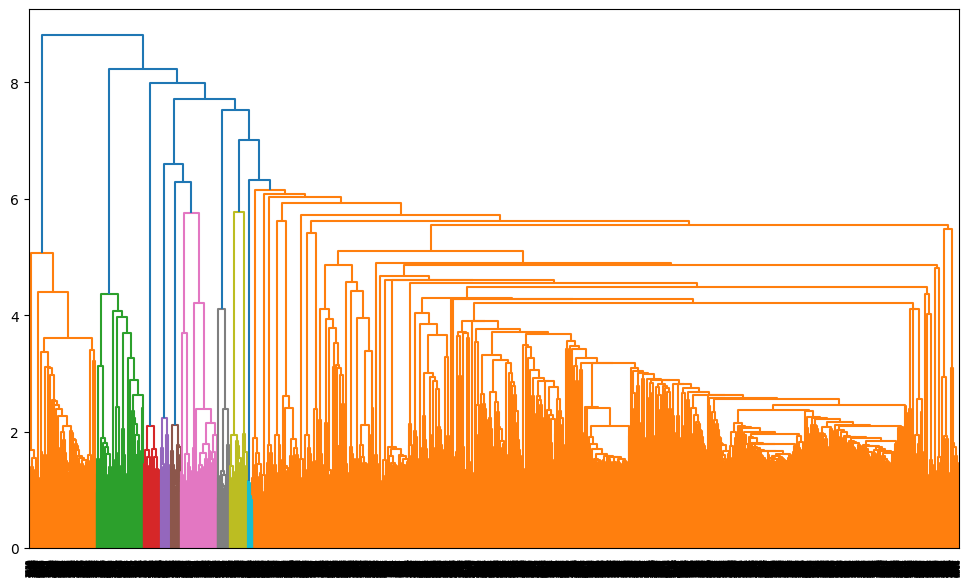

In [ ]:
# plt.figure(figsize=(12,7))
# dend = shc.dendrogram(shc.linkage(df2, method='ward'))
# # y축을 기준으로 클러스터 개수를 나눔

In [ ]:
# df_ward_ex.to_pickle('을지로신당 술집_cluster2(2022).pkl')
# df_ward_ex.to_csv('을지로신당 술집_clustering2(2022).csv', encoding='utf-8-sig')

In [ ]:
# df_ward['클러스터'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
# df_ward_ex['클러스터'].unique()

array([0, 3, 4, 1, 2], dtype=int64)